In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc

In [3]:
df = pd.read_csv('water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,6.888843,188.920671,27368.014339,8.003187,355.478563,465.346979,12.377083,75.112494,4.512332,1
1,9.135694,194.815618,9496.910354,6.185925,345.714206,562.771467,13.676435,74.424166,3.281802,0
2,7.920795,173.357151,13454.634777,6.947895,356.768119,471.368695,16.477840,68.000508,3.374327,0
3,6.630122,192.521703,36269.701317,4.973866,277.499297,320.470853,14.786347,80.980213,3.352765,1
4,6.128426,141.492410,9615.832710,7.627919,277.951704,415.008737,16.435843,50.693927,4.633824,0


<h2>Data Cleaning</h2>

In [4]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [5]:
df.shape

(2556, 10)

In [6]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2184.000000,2556.000000,2556.000000,2556.000000,1947.000000,2556.000000,2556.000000,2427.000000,2556.000000,2556.000000
mean,7.085754,196.227080,22028.619440,7.121046,333.323422,426.427758,14.229341,66.401031,3.973085,0.500000
std,1.559554,33.289700,8886.357029,1.624426,42.578855,80.919664,3.260507,16.084792,0.780783,0.500098
min,0.227499,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,8.175876,1.492207,0.000000
25%,6.103432,176.676887,15516.478436,6.129635,306.388277,365.013500,12.065966,55.873443,3.436981,0.000000
50%,7.025381,196.895580,20915.478050,7.139468,332.766156,423.438372,14.171463,66.597336,3.961006,0.500000
75%,8.060974,216.674288,27365.833357,8.118469,360.355887,482.487877,16.440410,77.274009,4.512793,1.000000
max,13.541240,323.124000,61227.196008,13.127000,481.030642,708.226364,27.006707,124.000000,6.739000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2184 non-null   float64
 1   Hardness         2556 non-null   float64
 2   Solids           2556 non-null   float64
 3   Chloramines      2556 non-null   float64
 4   Sulfate          1947 non-null   float64
 5   Conductivity     2556 non-null   float64
 6   Organic_carbon   2556 non-null   float64
 7   Trihalomethanes  2427 non-null   float64
 8   Turbidity        2556 non-null   float64
 9   Potability       2556 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 199.8 KB


In [8]:
counts = df['Potability'].value_counts()
counts

Potability
1    1278
0    1278
Name: count, dtype: int64

In [9]:
df['Potability'].unique()

array([1, 0], dtype=int64)

<Axes: >

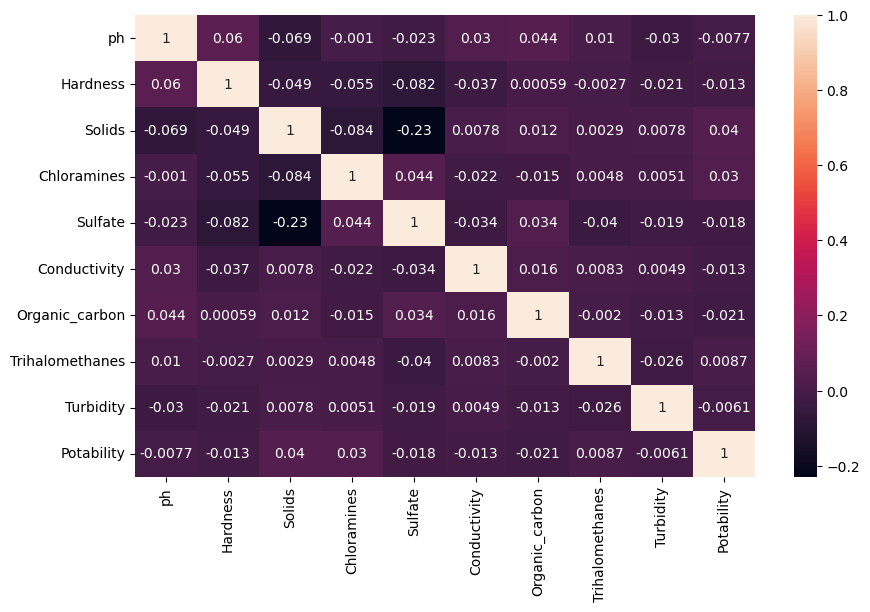

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)

In [11]:
df.isnull().sum()

ph                 372
Hardness             0
Solids               0
Chloramines          0
Sulfate            609
Conductivity         0
Organic_carbon       0
Trihalomethanes    129
Turbidity            0
Potability           0
dtype: int64

<Axes: >

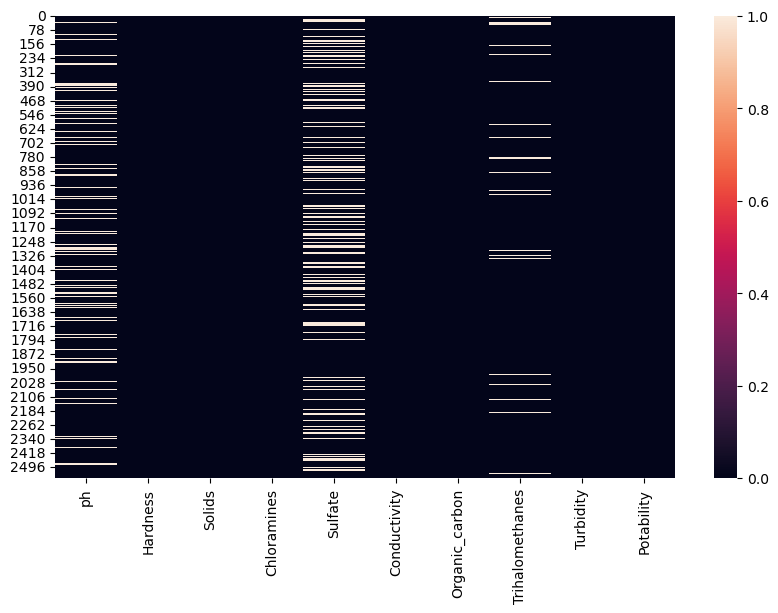

In [12]:
plt.figure(figsize = (10,6))
sns.heatmap(df.isnull())

Text(0, 0.5, 'Percentage of missing values')

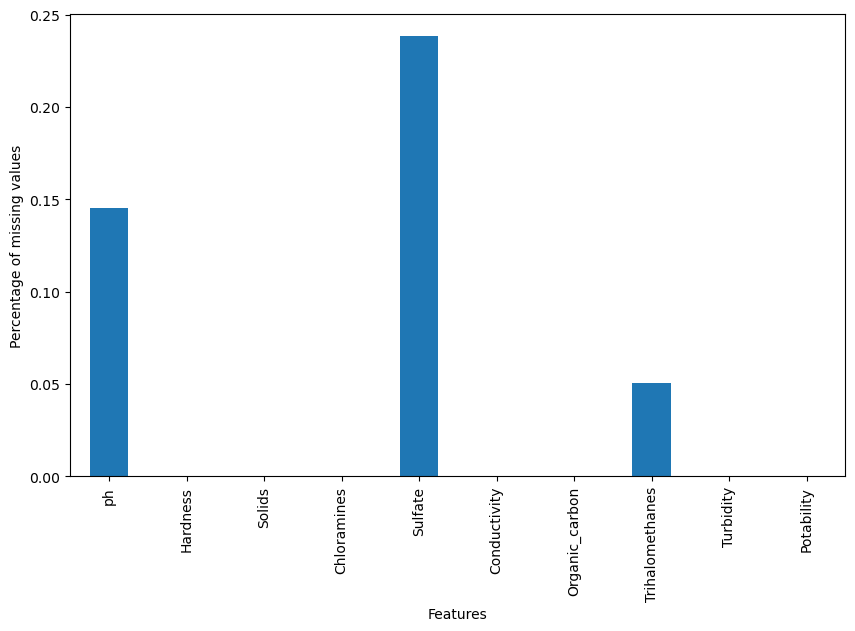

In [13]:
df.isnull().mean().plot.bar(figsize=(10,6))
plt.xlabel("Features")
plt.ylabel("Percentage of missing values")

In [14]:
df['ph'] = df['ph'].fillna(df['ph'].mean())
df['Sulfate'] = df['Sulfate'].fillna(df['Sulfate'].mean())
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean())

In [15]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [16]:
corr_matrix = df.corr()
corr_matrix

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.055563,-0.063258,-0.000952,-0.018619,0.027491,0.040882,0.008937,-0.027986,-0.007155
Hardness,0.055563,1.000000,-0.049000,-0.054993,-0.071956,-0.037287,0.000595,-0.002603,-0.021271,-0.012809
Solids,-0.063258,-0.049000,1.000000,-0.083876,-0.199945,0.007813,0.011807,0.002805,0.007776,0.039999
Chloramines,-0.000952,-0.054993,-0.083876,1.000000,0.038142,-0.022318,-0.014656,0.004667,0.005077,0.029735
Sulfate,-0.018619,-0.071956,-0.199945,0.038142,1.000000,-0.029960,0.029517,-0.034556,-0.016294,-0.015692
Conductivity,0.027491,-0.037287,0.007813,-0.022318,-0.029960,1.000000,0.015683,0.008090,0.004932,-0.012904
Organic_carbon,0.040882,0.000595,0.011807,-0.014656,0.029517,0.015683,1.000000,-0.001963,-0.013215,-0.020997
Trihalomethanes,0.008937,-0.002603,0.002805,0.004667,-0.034556,0.008090,-0.001963,1.000000,-0.024967,0.008467
Turbidity,-0.027986,-0.021271,0.007776,0.005077,-0.016294,0.004932,-0.013215,-0.024967,1.000000,-0.006094
Potability,-0.007155,-0.012809,0.039999,0.029735,-0.015692,-0.012904,-0.020997,0.008467,-0.006094,1.000000


<Axes: >

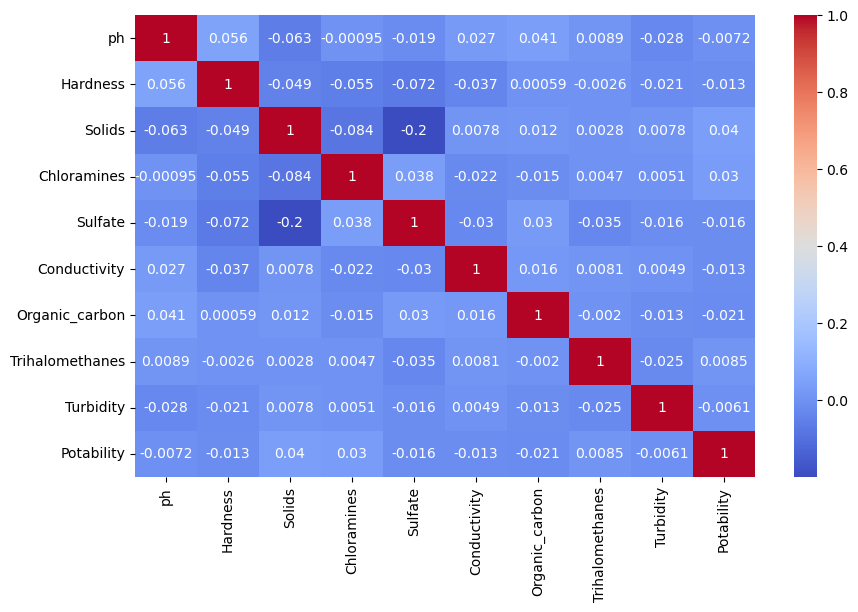

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot = True, cmap='coolwarm')

In [18]:
X = df.drop(columns=['Potability'])
X

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,6.888843,188.920671,27368.014339,8.003187,355.478563,465.346979,12.377083,75.112494,4.512332
1,9.135694,194.815618,9496.910354,6.185925,345.714206,562.771467,13.676435,74.424166,3.281802
2,7.920795,173.357151,13454.634777,6.947895,356.768119,471.368695,16.477840,68.000508,3.374327
3,6.630122,192.521703,36269.701317,4.973866,277.499297,320.470853,14.786347,80.980213,3.352765
4,6.128426,141.492410,9615.832710,7.627919,277.951704,415.008737,16.435843,50.693927,4.633824
...,...,...,...,...,...,...,...,...,...
2551,6.541008,195.566889,29616.492869,7.108628,328.998540,530.799668,11.899398,68.141446,2.355934
2552,6.944868,198.476439,16904.201091,6.341407,299.521673,470.599761,15.045817,61.146087,4.241135
2553,6.195087,195.443160,19331.194042,9.112558,342.871807,425.502874,17.212455,85.114196,4.196558
2554,6.225152,169.741172,29533.608826,5.574917,333.323422,380.114751,17.595510,75.519059,2.770823


In [19]:
y = df['Potability']
y

0       1
1       0
2       0
3       1
4       0
       ..
2551    0
2552    1
2553    1
2554    0
2555    1
Name: Potability, Length: 2556, dtype: int64

In [20]:
X.shape, y.shape

((2556, 9), (2556,))

<h2>Feature Scalling</h2>

In [21]:
std_scaler = StandardScaler()

In [22]:
X_scaled = std_scaler.fit_transform(X)
X_scaled

array([[-0.13662276, -0.21952254,  0.60097064, ..., -0.56820009,
         0.55591787,  0.6907837 ],
       [ 1.42231077, -0.04240766, -1.4104949 , ..., -0.16960986,
         0.5119926 , -0.88554451],
       [ 0.57937655, -0.68713161, -0.96503689, ...,  0.68975105,
         0.10206987, -0.76701942],
       ...,
       [-0.61797175, -0.02355306, -0.30360621, ...,  0.9151022 ,
         1.19417183,  0.2862721 ],
       [-0.59711163, -0.79577442,  0.84471712, ...,  1.03260838,
         0.58186266, -1.54011718],
       [ 2.04018716, -3.06868967,  0.39185451, ..., -0.71848895,
         0.18333579, -0.30341745]])

<h2>Training and Testing Dataset</h2>

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

<h1>Logistic Regression</h1>

In [24]:
model_lr = LogisticRegression()
model_lr

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [25]:
model_lr.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [26]:
pred_lr = model_lr.predict(X_test)
pred_lr

array([1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,

In [27]:
accuracy_score_lr = accuracy_score(y_test, pred_lr)
accuracy_score_lr*100

50.390625

In [28]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.48      0.68      0.56       239
           1       0.56      0.35      0.43       273

    accuracy                           0.50       512
   macro avg       0.52      0.51      0.49       512
weighted avg       0.52      0.50      0.49       512



In [29]:
cm1 = confusion_matrix(y_test, pred_lr)
cm1

array([[163,  76],
       [178,  95]], dtype=int64)

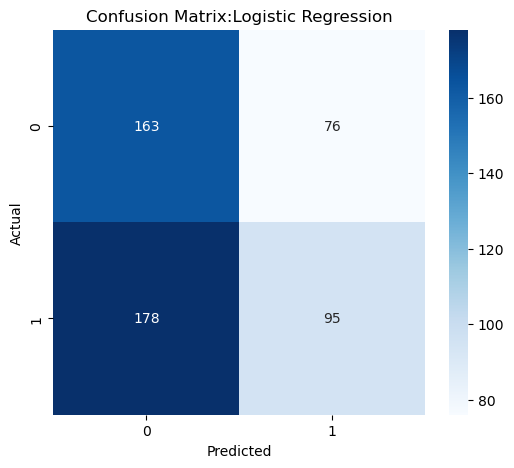

In [30]:
plt.figure(figsize=(6,5))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix:Logistic Regression")
plt.show()

<h1>Random Forest Classifiers</h1>

In [31]:
model_rf = RandomForestClassifier(n_estimators=200,max_depth=15, random_state=42)
model_rf

,n_estimators,200
,criterion,'gini'
,max_depth,15
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [32]:
model_rf.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,15
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [33]:
pred_rf = model_rf.predict(X_test)
pred_rf

array([0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,

In [34]:
accuracy_score_rf = accuracy_score(y_test, pred_rf)
accuracy_score_rf*100

63.8671875

In [35]:
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.60      0.68      0.64       239
           1       0.68      0.60      0.64       273

    accuracy                           0.64       512
   macro avg       0.64      0.64      0.64       512
weighted avg       0.64      0.64      0.64       512



In [36]:
cm2 = confusion_matrix(y_test, pred_rf)
cm2

array([[163,  76],
       [109, 164]], dtype=int64)

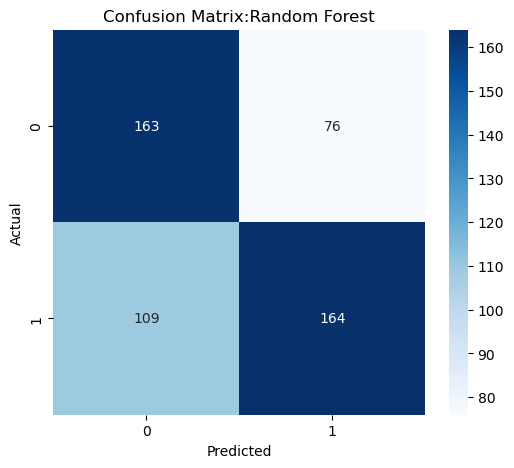

In [37]:
plt.figure(figsize=(6,5))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix:Random Forest")
plt.show()

<h1>K-Nearest Neighbors Clasifier</h1>

In [38]:
for i in range(3,20):
    model_knn = KNeighborsClassifier(n_neighbors=i)
    model_knn.fit(X_train, y_train)
    pred_knn = model_knn.predict(X_test)
    accuracy_score_knn = accuracy_score(y_test, pred_knn)
    print(i,accuracy_score_knn)

3 0.583984375
4 0.5625
5 0.55078125
6 0.5390625
7 0.556640625
8 0.544921875
9 0.548828125
10 0.548828125
11 0.556640625
12 0.552734375
13 0.568359375
14 0.564453125
15 0.56640625
16 0.552734375
17 0.556640625
18 0.5546875
19 0.556640625


In [39]:
    model_knn = KNeighborsClassifier(n_neighbors=3)

In [40]:
    model_knn.fit(X_train, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [41]:
    pred_knn = model_knn.predict(X_test)

In [42]:
    accuracy_score_knn = accuracy_score(y_test, pred_knn)
    print(accuracy_score_knn*100)

58.3984375


In [43]:
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.55      0.64      0.59       239
           1       0.63      0.53      0.58       273

    accuracy                           0.58       512
   macro avg       0.59      0.59      0.58       512
weighted avg       0.59      0.58      0.58       512



In [44]:
cm3 = confusion_matrix(y_test, pred_knn)
cm3

array([[154,  85],
       [128, 145]], dtype=int64)

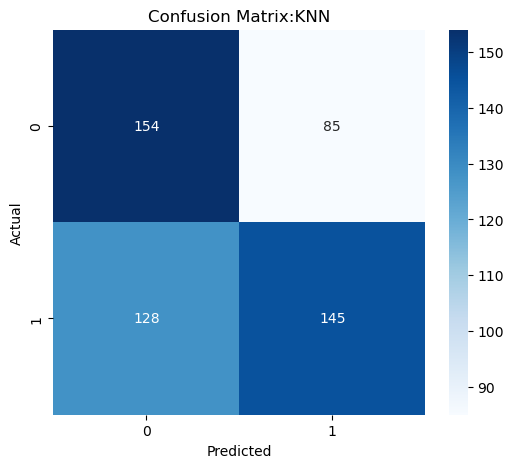

In [45]:
plt.figure(figsize=(6,5))
sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix:KNN")
plt.show()

<h2>Comparison of the Models</h2>

In [46]:
models = {
    'lr': LogisticRegression(),
    'rf': RandomForestClassifier(n_estimators=200,max_depth=15, random_state=42),
    'knn': KNeighborsClassifier(n_neighbors=3)
}

In [47]:
# Train models and store predictions
for i, j in models.items():
    print(f"\n\tDetail of {models[i]}\n")
    models[i].fit(X_train, y_train)
    y_pred = models[i].predict(X_test)
    # Print report
    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred)*100)


	Detail of LogisticRegression()

              precision    recall  f1-score   support

           0       0.48      0.68      0.56       239
           1       0.56      0.35      0.43       273

    accuracy                           0.50       512
   macro avg       0.52      0.51      0.49       512
weighted avg       0.52      0.50      0.49       512

Accuracy: 50.390625

	Detail of RandomForestClassifier(max_depth=15, n_estimators=200, random_state=42)

              precision    recall  f1-score   support

           0       0.60      0.68      0.64       239
           1       0.68      0.60      0.64       273

    accuracy                           0.64       512
   macro avg       0.64      0.64      0.64       512
weighted avg       0.64      0.64      0.64       512

Accuracy: 63.8671875

	Detail of KNeighborsClassifier(n_neighbors=3)

              precision    recall  f1-score   support

           0       0.55      0.64      0.59       239
           1       0.63     

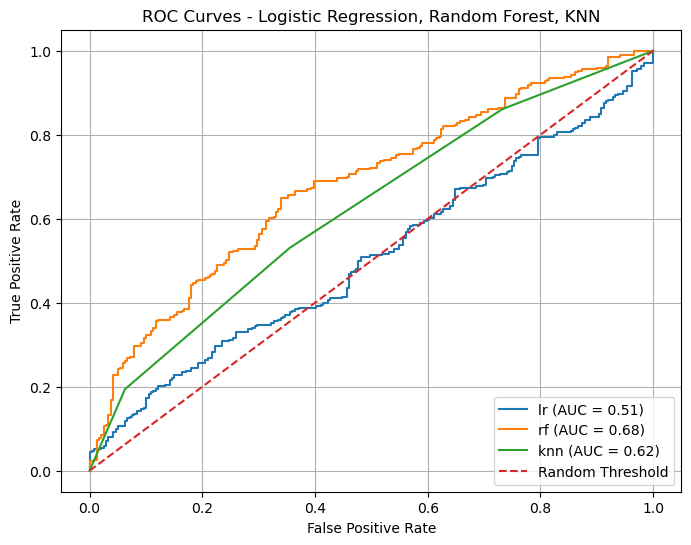

In [57]:
plt.figure(figsize=(8,6))

for name, model in models.items():
    # Train model
    model.fit(X_train, y_train)
    
    # Predicted probabilities for positive class
    y_proba = model.predict_proba(X_test)[:,1]
    
    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    
    # Compute AUC
    rocsuc = auc(fpr, tpr)
    
    # Plot ROC curve with AUC in the label
    plt.plot(fpr, tpr, label=f"{name} (AUC = {rocsuc:.2f})")

# Diagonal line for random guessing
plt.plot([0,1], [0,1], '--', label='Random Threshold')

plt.title("ROC Curves - Logistic Regression, Random Forest, KNN")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [58]:
results_df = pd.DataFrame({
    'Precision': [0.52, 0.59, 0.64],
    'Recall':    [0.50, 0.58, 0.64],
    'F1-Score':  [0.49, 0.58, 0.64],
    'Accuracy':  [0.50, 0.58, 0.64]
}, index=['Logistic Regression', 'KNN', 'Random Forest'])

results_df


,Precision,Recall,F1-Score,Accuracy
Logistic Regression,0.52,0.50,0.49,0.50
KNN,0.59,0.58,0.58,0.58
Random Forest,0.64,0.64,0.64,0.64


Text(0.5, 1.0, 'Comparison of Model Accuracy')

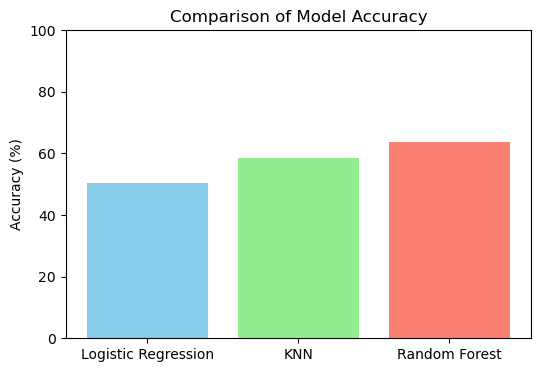

In [59]:
model_name = ['Logistic Regression', 'KNN', 'Random Forest']
values = [50.39, 58.39, 63.86]

plt.figure(figsize=(6,4))
plt.bar(model_name, values, color=['skyblue', 'lightgreen', 'salmon'])
plt.ylim(0, 100)
plt.ylabel("Accuracy (%)")
plt.title("Comparison of Model Accuracy")

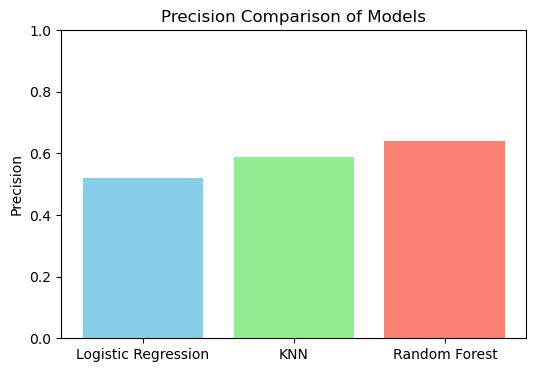

In [60]:
plt.figure(figsize=(6,4))
plt.bar(results_df.index, results_df['Precision'], color=['skyblue','lightgreen','salmon'])
plt.ylim(0, 1)
plt.ylabel('Precision')
plt.title('Precision Comparison of Models')
plt.show()


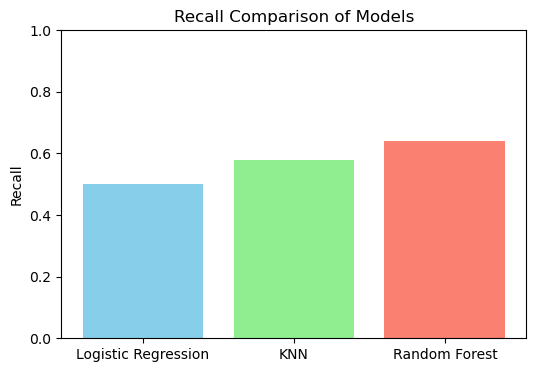

In [61]:
plt.figure(figsize=(6,4))
plt.bar(results_df.index, results_df['Recall'], color=['skyblue','lightgreen','salmon'])
plt.ylim(0, 1)
plt.ylabel('Recall')
plt.title('Recall Comparison of Models')
plt.show()


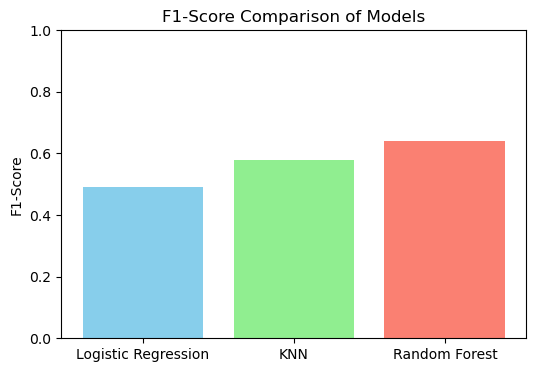

In [62]:
plt.figure(figsize=(6,4))
plt.bar(results_df.index, results_df['F1-Score'], color=['skyblue','lightgreen','salmon'])
plt.ylim(0, 1)
plt.ylabel('F1-Score')
plt.title('F1-Score Comparison of Models')
plt.show()


In [68]:
def predict_water(sample):
    # Convert sample into DataFrame with correct column names
    sample_df = pd.DataFrame([sample], columns=X.columns)
    
    # Scale the sample using the same scaler
    sample_scaled = std_scaler.transform(sample_df)
    # Store predictions
    predictions = {}
    predictions["Logistic Regression"] = (
        "Potable" if model_lr.predict(sample_scaled)[0] == 1 else "Not Potable"
    )
    
    predictions["Random Forest"] = (
        "Potable" if model_rf.predict(sample_scaled)[0] == 1 else "Not Potable"
    )
    
    predictions["KNN"] = (
        "Potable" if model_knn.predict(sample_scaled)[0] == 1 else "Not Potable"
    )
    
    return predictions

# water sample features
sample = [7, 173, 13454, 6, 356, 471, 16, 68, 3] # ph, Hardness, Solids, Chloramines, Sulfate, Conductivity, Organic_carbon, Trihalomethanes, Turbidity
prediction = predict_water(sample)
print("Predictions for the water sample:")
for model, result in prediction.items():
    print(f"{model}: {result}")

Predictions for the water sample:
Logistic Regression: Not Potable
Random Forest: Not Potable
KNN: Not Potable


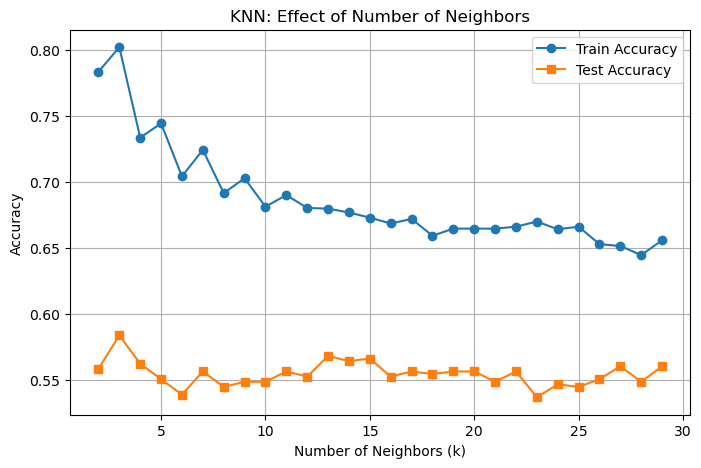

In [64]:
train_score = []
test_score = []

n_neighbors = range(2, 30)

for k in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    train_score.append(knn.score(X_train, y_train))
    test_score.append(knn.score(X_test, y_test))

plt.figure(figsize=(8,5))
plt.plot(n_neighbors, train_score, label="Train Accuracy", marker='o')
plt.plot(n_neighbors, test_score, label="Test Accuracy", marker='s')

plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("KNN: Effect of Number of Neighbors")
plt.legend()
plt.grid(True)

plt.show()


<h2>Hyperparameter Tuning</h2>

In [65]:
best_k = n_neighbors[np.argmax(test_score)]
print("Best value of k:", best_k)


Best value of k: 3


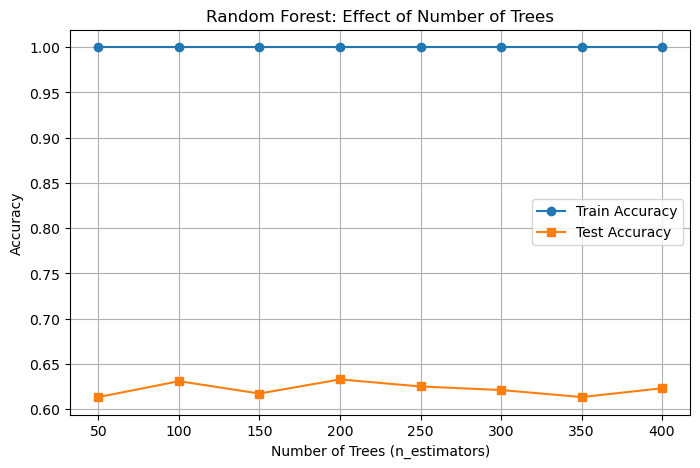

In [66]:
train_score_rf = []
test_score_rf = []

n_estimators = range(50, 401, 50)

for n in n_estimators:
    rf = RandomForestClassifier(
        n_estimators=n,
        random_state=42
    )
    rf.fit(X_train, y_train)
    
    train_score_rf.append(rf.score(X_train, y_train))
    test_score_rf.append(rf.score(X_test, y_test))

plt.figure(figsize=(8,5))
plt.plot(n_estimators, train_score_rf, label="Train Accuracy", marker='o')
plt.plot(n_estimators, test_score_rf, label="Test Accuracy", marker='s')

plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.title("Random Forest: Effect of Number of Trees")
plt.legend()
plt.grid(True)

plt.show()


In [67]:
best_n = n_estimators[np.argmax(test_score_rf)]
print("Best number of trees:", best_n)


Best number of trees: 200
